**Parallel BFS**

Problem Statement: Design and Implement Parallel Breadth First Search and Depth First Search based on existing algorithms using OpenMP. Use a Tree or an undirected graph for BFS and DFS. 

setx CUDA_PATH "C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.4" /M
setx CUDA_NVCC_EXECUTABLE "C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.4\bin\nvcc.exe" /M

conda env config vars set PATH="C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.4\bin;%PATH%"

conda install -c conda-forge m2w64-toolchain
g++ --version



In [6]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [7]:
%%writefile BFS.cpp
#include<iostream>
#include<stdlib.h>
#include<queue>
using namespace std;


class node
{
   public:
    node *left, *right;
    int data;
};

class Breadthfs
{

 public:
 	node *insert(node *, int);
 	void bfs(node *);
};


node *insert(node *root, int data)
// inserts a node in tree
{
    if(!root)
    {

   	 root=new node;
   	 root->left=NULL;
   	 root->right=NULL;
   	 root->data=data;
   	 return root;
    }

    queue<node *> q;
    q.push(root);

    while(!q.empty())
    {
   	 node *temp=q.front();
   	 q.pop();

   	 if(temp->left==NULL)
   	 {

   		 temp->left=new node;
   		 temp->left->left=NULL;
   		 temp->left->right=NULL;
   		 temp->left->data=data;
   		 return root;
   	 }
   	 else
   	 {
   	 q.push(temp->left);
   	 }

   	 if(temp->right==NULL)
   	 {
   		 temp->right=new node;
   		 temp->right->left=NULL;
   		 temp->right->right=NULL;
   		 temp->right->data=data;
   		 return root;
   	 }
   	 else
   	 {
   	 q.push(temp->right);
   	 }
    }
    return root;
}


void bfs(node *head)
{
   	 queue<node*> q;
   	 q.push(head);

   	 int qSize;

   	 while (!q.empty())
   	 {
   		 qSize = q.size();
   		 #pragma omp parallel for
            	//creates parallel threads
   		 for (int i = 0; i < qSize; i++)
   		 {
   			 node* currNode;
   			 #pragma omp critical
   			 {
   			   currNode = q.front();
   			   q.pop();
   			   cout<<"\t"<<currNode->data;

   			 }// prints parent node
   			 #pragma omp critical
   			 {
   			 if(currNode->left)// push parent's left node in queue
   				 q.push(currNode->left);
   			 if(currNode->right)
   				 q.push(currNode->right);
   			 }// push parent's right node in queue

   		 }
   	 }

}

int main(){
    node *root=NULL;
    int data;
    char ans;
    do
    {
   	 cout<<"\n enter data=>";
   	 cin>>data;

   	 root=insert(root,data);

   	 cout<<"do you want insert one more node?";
   	 cin>>ans;

    }while(ans=='y'||ans=='Y');

    bfs(root);

    return 0;
}



Overwriting BFS.cpp


In [8]:
!g++ -fopenmp BFS.cpp -o BFS_Program

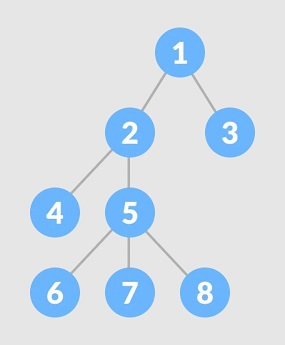



In [10]:
!./BFS_Program


 enter data=>7
do you want insert one more node?y

 enter data=>8
do you want insert one more node?y

 enter data=>1
do you want insert one more node?y

 enter data=>5
do you want insert one more node?y

 enter data=>6
do you want insert one more node?n
	7	8	1	5	6

**Parallel DFS**

In [11]:
%%writefile DFS.cpp
#include <iostream>
#include <vector>
#include <stack>
#include <omp.h>

using namespace std;

const int MAX = 100000;
vector<int> graph[MAX];
bool visited[MAX];

void dfs(int node) {
	stack<int> s;
	s.push(node);

	while (!s.empty()) {
    	int curr_node = s.top();
    	s.pop();

    	if (!visited[curr_node]) {
        	visited[curr_node] = true;

        	if (visited[curr_node]) {
        	cout << curr_node << " ";
    	}

        	#pragma omp parallel for
        	for (int i = 0; i < graph[curr_node].size(); i++) {
            	int adj_node = graph[curr_node][i];
            	if (!visited[adj_node]) {
                	s.push(adj_node);
            	}
        	}
    	}
	}
}

int main() {
	int n, m, start_node;
	cout << "Enter No of Node,Edges,and start node:" ;
	cin >> n >> m >> start_node;
         //n: node,m:edges

cout << "Enter Pair of edges:" ;
	for (int i = 0; i < m; i++) {
    	int u, v;

    	cin >> u >> v;
//u and v: Pair of edges
    	graph[u].push_back(v);
    	graph[v].push_back(u);
	}

	#pragma omp parallel for
	for (int i = 0; i < n; i++) {
    	visited[i] = false;
	}

	dfs(start_node);

/*	for (int i = 0; i < n; i++) {
    	if (visited[i]) {
        	cout << i << " ";
    	}
	}*/

	return 0;
}



Overwriting DFS.cpp


In [12]:
!g++ -fopenmp DFS.cpp -o DFS_Program

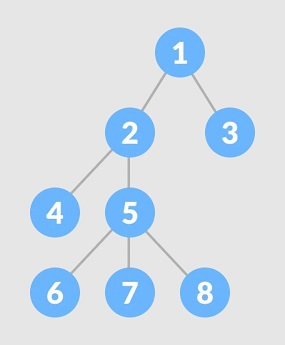

In [15]:
!./DFS_Program

Enter No of Node,Edges,and start node:5
4
7
Enter Pair of edges:5 1
5 6 
1 7
1 8
7 1 5 6 8 